# Analysis of features diurnal and seasonal

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.dates as mdates

# [blå, rød, grønn, lilla, oransje, lyseblå, rosa, lysegrønn, lyserosa, gul]
colors = px.colors.qualitative.Plotly


In [2]:
df2015 = pd.read_csv('../data/kaasa/kaasa_2015.csv', index_col=None, header=0)
df2016 = pd.read_csv('../data/kaasa/kaasa_2016.csv', index_col=None, header=0)
df2017 = pd.read_csv('../data/kaasa/kaasa_2017.csv', index_col=None, header=0)
df2018 = pd.read_csv('../data/kaasa/kaasa_2018.csv', index_col=None, header=0)
df2019 = pd.read_csv('../data/kaasa/kaasa_2019.csv', index_col=None, header=0)
df2020 = pd.read_csv('../data/kaasa/kaasa_2020.csv', index_col=None, header=0)
df2021 = pd.read_csv('../data/kaasa/kaasa_2021.csv', index_col=None, header=0)

files = [df2015, df2016, df2017, df2018, df2019, df2020, df2021]

df_tot = pd.concat(files, axis=0, ignore_index=True)


### Add two extra column (group_time and group) which group each sample in a 4 hour group and in a hourly group

In [3]:
#Extract needed features
df = df_tot.loc[:, ['altitude', 'angle', 'velocity', 'temperature', 'attack', 'date_time']]
df['date_time'] = pd.to_datetime(df['date_time'])

#Group by time interval
df['time'] = pd.to_datetime(df['date_time']).dt.time
new_date = pd.to_datetime('2023-03-10')
df['date_time_2'] = pd.to_datetime(df['time'], format='%H:%M:%S').apply(
    lambda t: pd.Timestamp.combine(new_date, t.time()))
time_interval = '6H'

df['rounded_time'] = df['date_time_2'].dt.floor(time_interval)
df['group'] = df.groupby('rounded_time').ngroup().astype(str)

#Group for each hour
df['date_time_3'] = pd.to_datetime(df['date_time_2'], format='%H:%M:%S').apply(
    lambda t: pd.Timestamp(t.replace(minute=0, second=0)))
df['group_time'] = df.groupby('date_time_3').ngroup()

group_counts = df['group'].value_counts()
print(group_counts)

print(df.loc[:,['group','date_time']])



0    60498
2    60363
3    59918
1    58665
Name: group, dtype: int64
       group           date_time
0          0 2015-06-13 03:38:06
1          0 2015-06-13 05:53:01
2          1 2015-06-13 07:37:40
3          1 2015-06-13 11:38:07
4          2 2015-06-13 15:38:07
...      ...                 ...
239439     2 2021-09-15 12:18:42
239440     2 2021-09-15 13:18:57
239441     2 2021-09-15 14:19:21
239442     2 2021-09-15 15:18:18
239443     2 2021-09-15 16:19:01

[239444 rows x 2 columns]


## Velocity

Text(0.5, 0, 'hour')

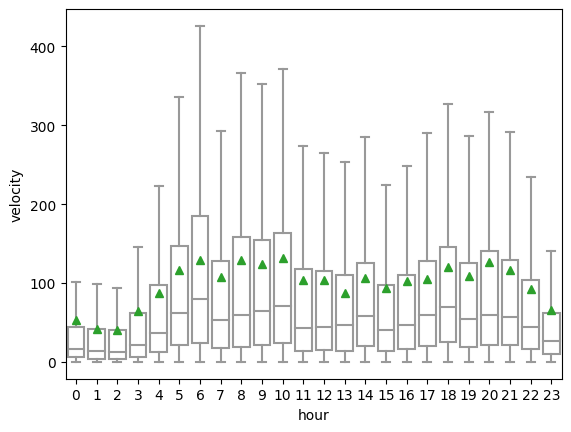

In [4]:

ax = sb.boxplot(x="group_time", y='velocity', data=df,
           showfliers=False, showmeans=True, color="White")
ax.set_xlabel('hour')

Text(0.5, 0, 'Group by six hours')

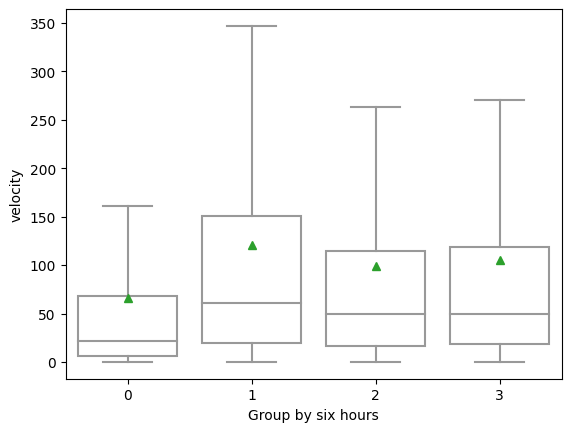

In [5]:
sorted_groups = df['group'].sort_values().unique()

ax = sb.boxplot(x="group", y='velocity', data=df,
           showfliers=False, showmeans=True, color="White", order=sorted_groups)
ax.set_xlabel('Group by six hours')


Text(0.5, 0, 'Group by six hours')

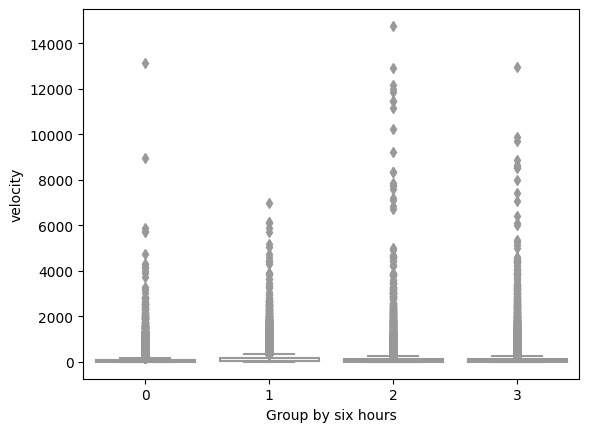

In [6]:
sorted_groups = df['group'].sort_values().unique()

ax = sb.boxplot(x="group", y='velocity', data=df,
                showfliers=True, color="White", order=sorted_groups)
ax.set_xlabel('Group by six hours')


Text(0.5, 0, 'hour')

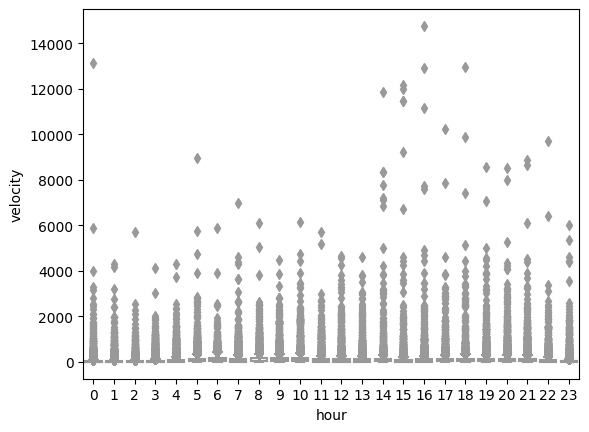

In [7]:

ax = sb.boxplot(x="group_time", y='velocity', data=df,
                showfliers=True, color="White")
ax.set_xlabel('hour')


## Angle

Text(0.5, 0, 'hour')

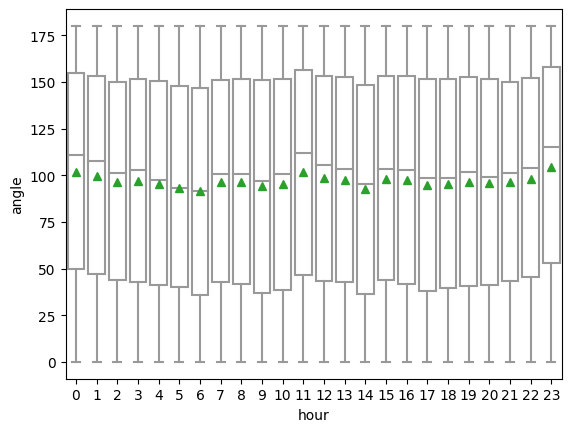

In [8]:
ax = sb.boxplot(x="group_time", y='angle', data=df,
           showfliers=False, showmeans=True, color="White")
ax.set_xlabel('hour')


Text(0.5, 0, 'Group by six hours')

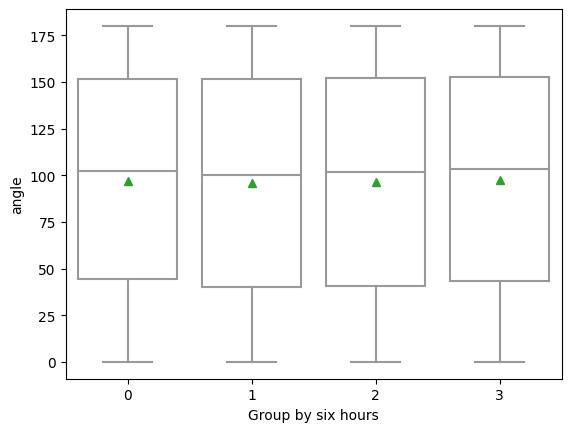

In [9]:
ax = sb.boxplot(x="group", y='angle', data=df,
           showfliers=False, showmeans=True, color="White")
ax.set_xlabel('Group by six hours')


## Altitude

Text(0.5, 0, 'hour')

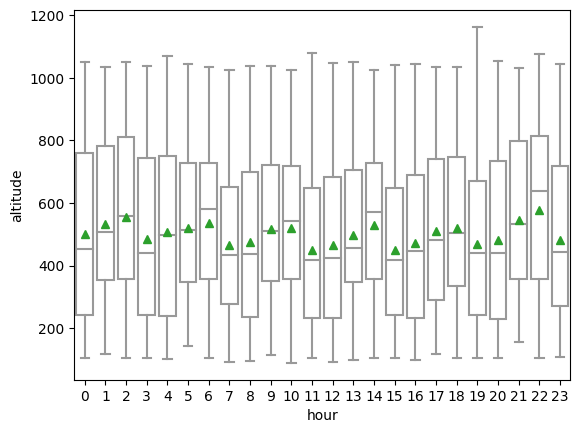

In [12]:
ax = sb.boxplot(x="group_time", y='altitude', data=df,
                showfliers=True, showmeans=True, color="White")
ax.set_xlabel('hour')


Text(0.5, 0, 'Group by six hours')

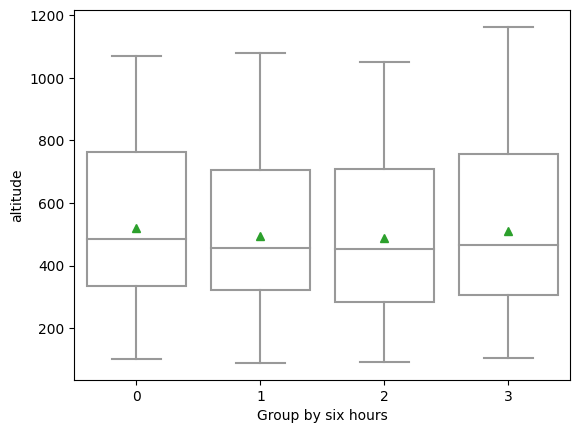

In [13]:
ax = sb.boxplot(x="group", y='altitude', data=df,
                showfliers=True, showmeans=True, color="White")
ax.set_xlabel('Group by six hours')


## Seasonal changes

/var/folders/87/wz6yr1nn5ps8c055ln0_26qh0000gn/T/ipykernel_25901/3892071076.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['date'] = df_new['date_time'].dt.date


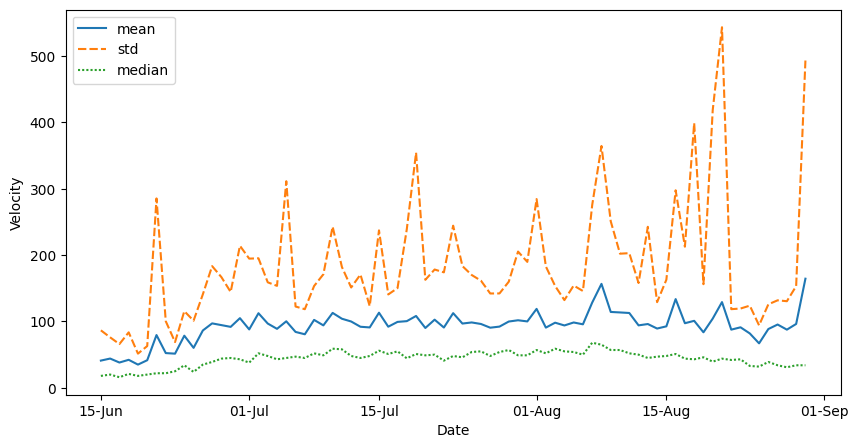

In [14]:
#Replace the year and time so it is just the date that is different
df['date_time'] = df['date_time'].apply(lambda x: x.replace(
    hour=0, minute=0, second=0, microsecond=0).replace(year=2023))

# Filter data for the period of interest
start_date = pd.to_datetime('2023-06-15')
end_date = pd.to_datetime('2023-08-30')
df_new = df[(df['date_time'] >= start_date) & (df['date_time'] <= end_date)]


df_new['date'] = df_new['date_time'].dt.date
df_mean_vel = df_new.groupby('date')[
    'velocity'].agg(['mean', 'std', 'median'])

plt.figure(figsize=(10, 5))  # set width and height in inches
ax = sns.lineplot(data=df_mean_vel[['mean', 'std', 'median']])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax.set_xlabel('Date')
ax.set_ylabel('Velocity')

plt.show()


In [15]:
# Teller kor mange occurencer som er i hver uke - det har noko å sei på resultatet 
monthly_stats = df_new.groupby(pd.Grouper(key='date_time', freq='W')).agg({
    'velocity': ['mean', 'median', 'std', 'count']})

print(monthly_stats)


              velocity                          
                  mean median         std  count
date_time                                       
2023-06-18   41.315954   19.0   78.947463   4469
2023-06-25   59.699944   23.0  135.314452  14364
2023-07-02   97.066823   42.0  181.252244  22567
2023-07-09   92.387167   47.0  180.428814  24452
2023-07-16  100.647000   52.0  182.978476  23881
2023-07-23  100.617284   48.0  224.346288  23571
2023-07-30   96.635591   52.0  167.761506  21882
2023-08-06   99.601617   54.0  185.146099  21399
2023-08-13  116.790323   55.0  251.302619  20379
2023-08-20  100.354460   45.0  276.267741  20180
2023-08-27   91.725486   38.0  235.911019  19948
2023-09-03  116.167722   33.0  309.644446   8216


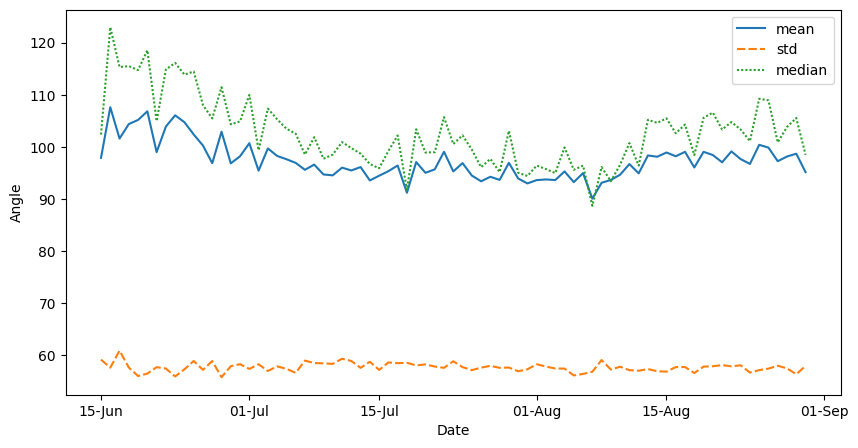

In [18]:
df_mean_angle = df_new.groupby('date')[
    'angle'].agg(['mean', 'std', 'median'])

plt.figure(figsize=(10, 5))  # set width and height in inches
ax = sns.lineplot(data=df_mean_angle[['mean', 'std', 'median']])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax.set_xlabel('Date')
ax.set_ylabel('Angle')

plt.show()


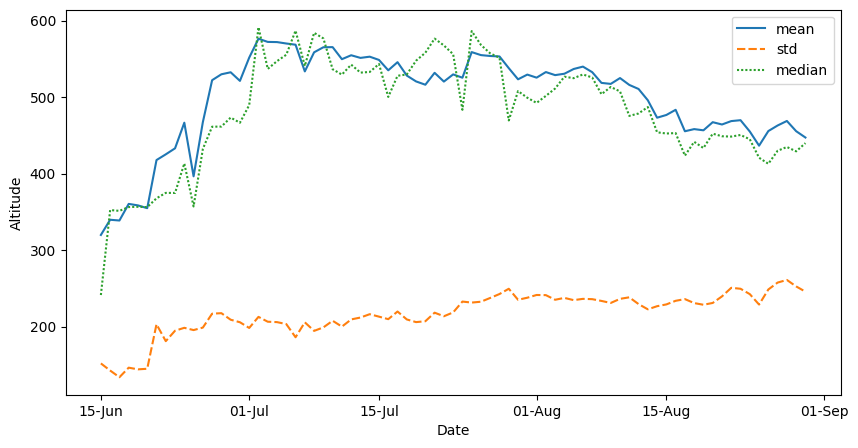

In [17]:
df_mean_alt = df_new.groupby('date')[
    'altitude'].agg(['mean', 'std', 'median'])

plt.figure(figsize=(10, 5))  # set width and height in inches
ax = sns.lineplot(data=df_mean_alt[['mean', 'std', 'median']])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax.set_xlabel('Date')
ax.set_ylabel('Altitude')

plt.show()
